In [68]:
import numpy as np
import pandas as pd
import yfinance as yf

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [69]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
aapl_df = yf.Ticker('AAPL').history(start='2000-01-01', end=None)
msft_df = yf.Ticker('MSFT').history(start='2000-01-01', end=None)

/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [71]:
aapl_df.index = pd.DatetimeIndex(aapl_df.index)
aapl_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,0.792742,0.850379,0.768648,0.846127,535796800,0.0,0.0
2000-01-04 00:00:00-05:00,0.818253,0.836206,0.764869,0.774790,512377600,0.0,0.0
2000-01-05 00:00:00-05:00,0.784238,0.835734,0.778569,0.786128,778321600,0.0,0.0
2000-01-06 00:00:00-05:00,0.802191,0.808805,0.718098,0.718098,767972800,0.0,0.0
2000-01-07 00:00:00-05:00,0.729436,0.763452,0.721878,0.752113,460734400,0.0,0.0


In [72]:
msft_df.index = pd.DatetimeIndex(msft_df.index)
msft_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,36.316970,36.703732,34.653893,36.065575,53228400,0.0,0.0
2000-01-04 00:00:00-05:00,35.137346,36.239619,34.731246,34.847275,54119000,0.0,0.0
2000-01-05 00:00:00-05:00,34.383160,36.007561,33.841693,35.214699,64059600,0.0,0.0
2000-01-06 00:00:00-05:00,34.711902,35.234031,33.532278,34.035069,54976600,0.0,0.0
2000-01-07 00:00:00-05:00,33.609636,34.731246,33.203535,34.479851,62013600,0.0,0.0


In [73]:
pair_df = aapl_df.join(msft_df, lsuffix='_x', rsuffix='_y')
pair_df.index = pair_df.index.tz_localize(None).astype('datetime64[ns]')
pair_df = pair_df[pair_df.index > np.datetime64('2012-01-01')]
pair_df.head()

,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends_x,Stock Splits_x,Open_y,High_y,Low_y,Close_y,Volume_y,Dividends_y,Stock Splits_y
Date,,,,,,,,,,,,,,
2012-01-03,12.378496,12.472226,12.366401,12.433826,302220800,0.0,0.0,21.064212,21.389497,20.937271,21.238756,64731500,0.0,0.0
2012-01-04,12.396635,12.538139,12.374865,12.500646,260022000,0.0,0.0,21.278425,21.794121,21.246690,21.738585,80516100,0.0,0.0
2012-01-05,12.546300,12.655147,12.477362,12.639425,271269600,0.0,0.0,21.722713,22.000396,21.651310,21.960728,56081400,0.0,0.0
2012-01-06,12.692040,12.782142,12.675410,12.771560,318292800,0.0,0.0,21.841724,22.365354,21.841724,22.301884,99455500,0.0,0.0
2012-01-09,12.865289,12.933319,12.739810,12.751300,394024400,0.0,0.0,22.254276,22.293946,21.992461,22.008329,59706800,0.0,0.0


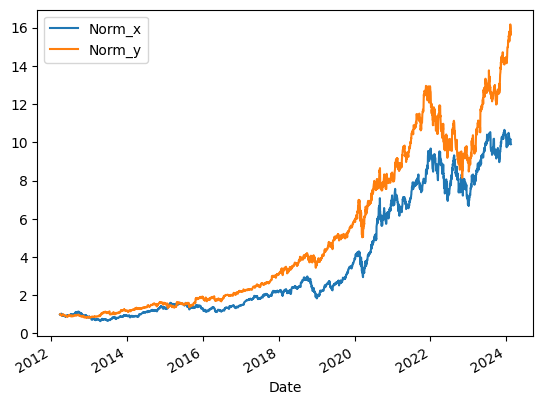

In [84]:
import common.util as util
util.pair_rebase(pair_df, 'Close_x', 'Close_y')
pair_df['Ratio'] = util.pair_rolling_avg(pair_df, 'Close_x', 'Close_y').dropna()
pair_df.plot(y=['Norm_x', 'Norm_y'])
pair_df['Outlier'] = util.flag_outliers(pair_df, 'Ratio', 2).copy()

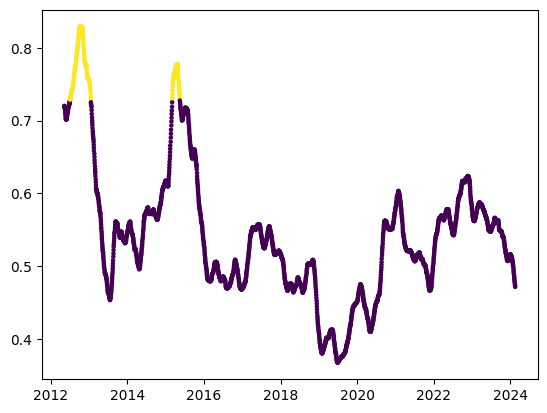

In [83]:
import matplotlib.pyplot as plt
plt.scatter(pair_df.index.values, pair_df['Ratio'], c=pair_df['Outlier'], s=5)
plt.show()

/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


count    2261.000000
mean        1.103088
std         0.552453
min         0.459065
25%         0.647732
50%         0.811007
75%         1.454002
max         2.523121
Name: Ratio, dtype: float64


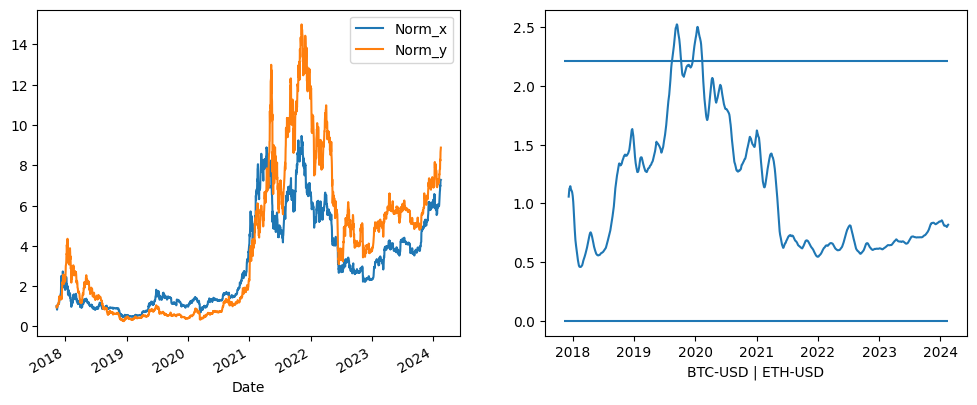

/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


count    2519.000000
mean        0.950261
std         0.140225
min         0.663336
25%         0.860783
50%         0.940123
75%         1.023849
max         1.405171
Name: Ratio, dtype: float64


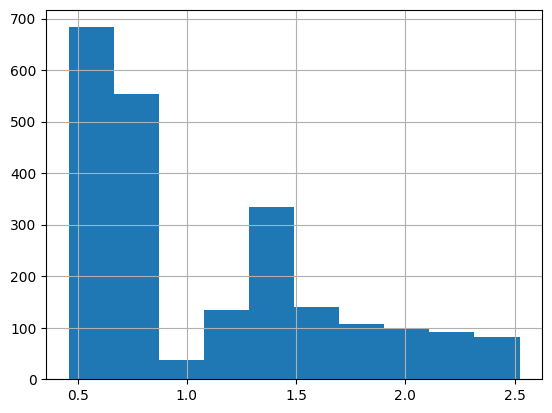

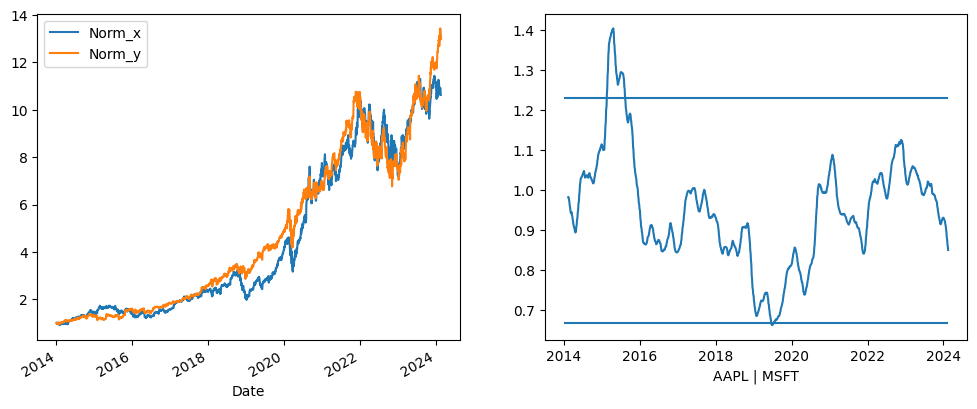

/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


count    2519.000000
mean        0.944307
std         0.215240
min         0.598166
25%         0.740232
50%         0.957290
75%         1.147169
max         1.345771
Name: Ratio, dtype: float64


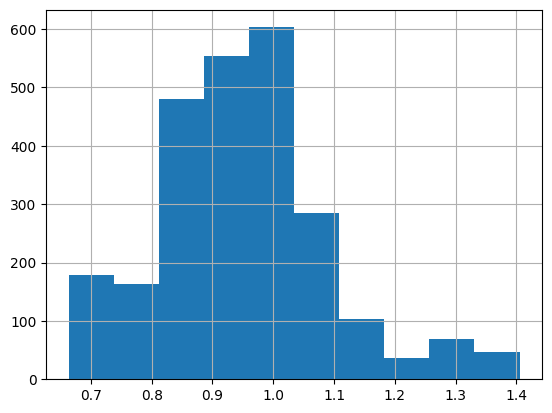

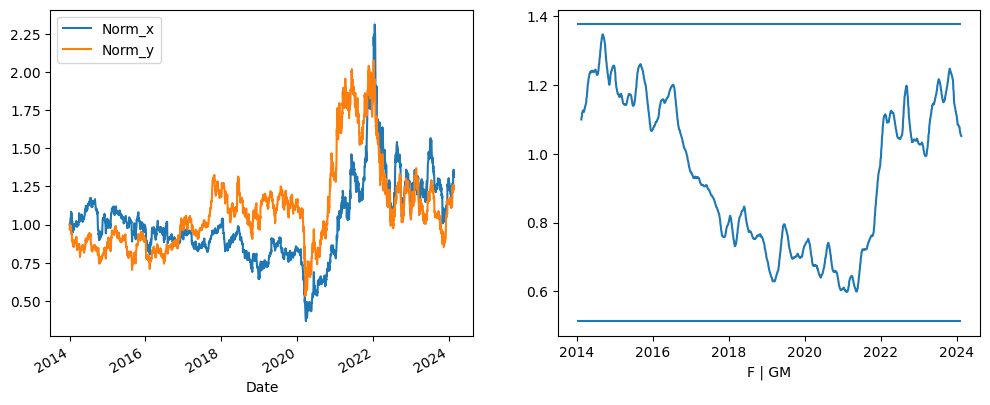

/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


count    2519.000000
mean        0.718809
std         0.258713
min         0.297227
25%         0.513182
50%         0.688865
75%         0.856736
max         1.442678
Name: Ratio, dtype: float64


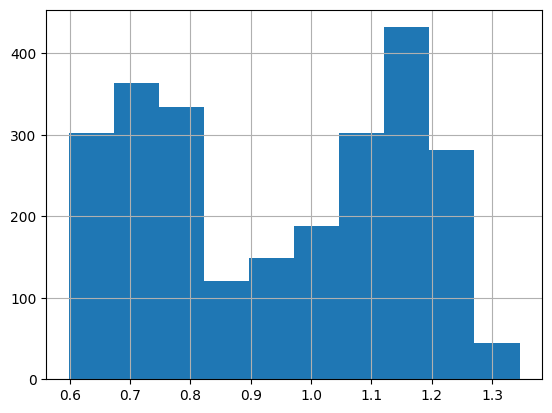

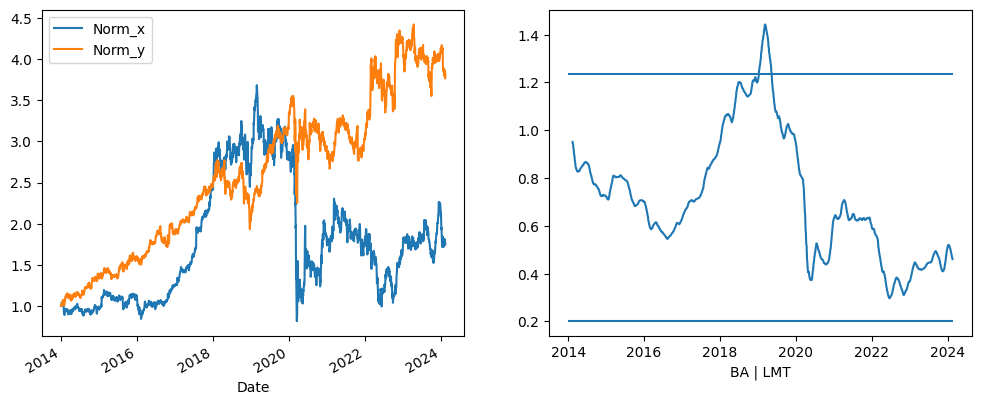

/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/adam/.local/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


count    978.000000
mean       0.811875
std        0.100206
min        0.626616
25%        0.749660
50%        0.809565
75%        0.876780
max        1.009446
Name: Ratio, dtype: float64


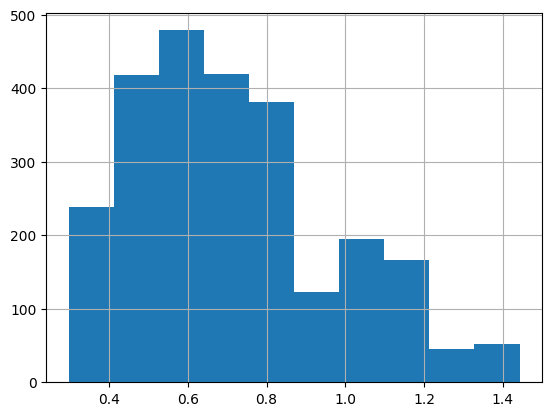

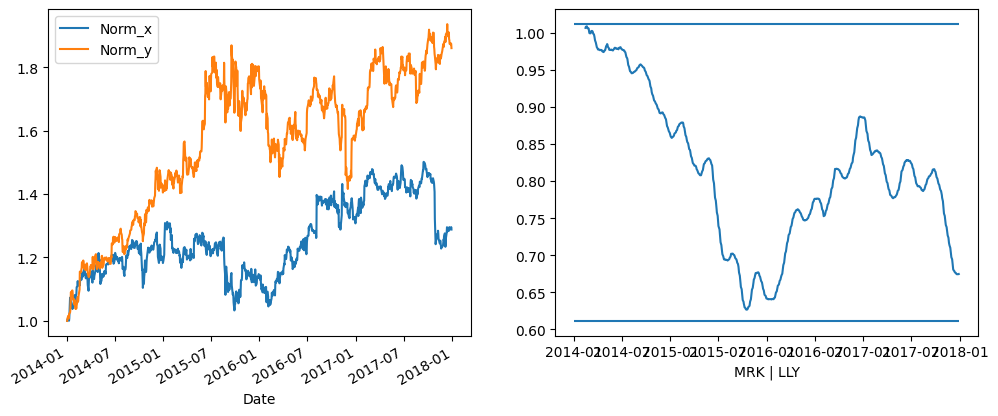

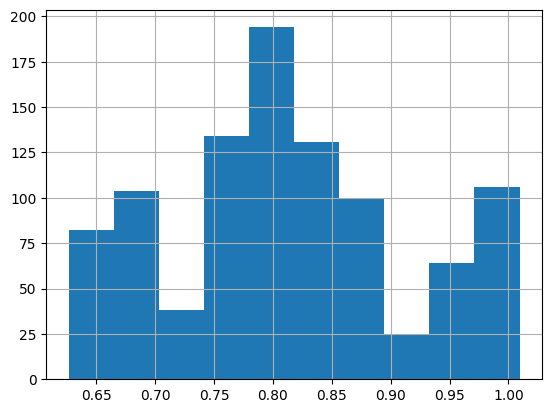

In [202]:
import common.util as util
import matplotlib.pyplot as plt

pairs = [
    ['BTC-USD', 'ETH-USD', None],
    ['AAPL', 'MSFT', ['2012-01-01', None]],
    ['F', 'GM', None],
    ['BA', 'LMT', None],
    ['MRK', 'LLY', ['2007-01-01', '2018-01-01']],
]

for pair in pairs:
    df_1 = yf.Ticker(pair[0]).history(start='2014-01-01', end=None)
    df_2 = yf.Ticker(pair[1]).history(start='2014-01-01', end=None)
    df_1.index = pd.DatetimeIndex(df_1.index)
    df_2.index = pd.DatetimeIndex(df_2.index)

    pair_df = df_1.join(df_2, lsuffix='_x', rsuffix='_y').dropna()
    pair_df.index = pair_df.index.tz_localize(None).astype('datetime64[ns]')
    if pair[2] != None:
        if pair[2][0] != None:
            pair_df = pair_df[pair_df.index > np.datetime64(pair[2][0])]
        if pair[2][1] != None:
            pair_df = pair_df[pair_df.index < np.datetime64(pair[2][1])]

    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_figwidth(12)

    util.pair_rebase(pair_df, 'Close_x', 'Close_y')
    pair_df['Ratio'] = util.pair_rolling_avg(pair_df, 'Norm_x', 'Norm_y').dropna()
    pair_df.plot(y=['Norm_x', 'Norm_y'], ax=axes[0])
    pair_df['Outlier'] = util.flag_outliers(pair_df, 'Ratio', 2).copy()

    l1 = pair_df['Ratio'].mean()-2*pair_df['Ratio'].std()
    l2 = pair_df['Ratio'].mean()+2*pair_df['Ratio'].std()
    print(pair_df['Ratio'].describe())
    axes[1].plot(pair_df.index.values, pair_df['Ratio'])
    axes[1].hlines(l1, xmin=pair_df.index.values[0], xmax=pair_df.index.values[-1])
    axes[1].hlines(l2, xmin=pair_df.index.values[0], xmax=pair_df.index.values[-1])
    axes[1].set_xlabel(f"{pair[0]} | {pair[1]}")
    plt.show()
    pair_df['Ratio'].hist()